In [19]:
# thêm thư viện
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf

In [20]:
import os

new_dir = r"D:\University\DataViz\Proj\Lab\DataViz_Lab02"

os.chdir(new_dir)

print(os.getcwd())

D:\University\DataViz\Proj\Lab\DataViz_Lab02


In [21]:
def plot_price_over_time_for_stock(df, stock_code):
    """
    Vẽ biểu đồ giá theo thời gian cho mã cổ phiếu cụ thể
    với nhãn trục x không bị chồng lấn.
    
    Args:
    - df: DataFrame chứa dữ liệu.
    - stock_code: Mã cổ phiếu cần vẽ biểu đồ.
    """
    # Đảm bảo cột Date ở định dạng datetime và là index
    if not pd.api.types.is_datetime64_any_dtype(df.index):
        df.index = pd.to_datetime(df.index)

    # Lọc dữ liệu theo mã cổ phiếu
    stock_data = df[df['XSTC'] == stock_code]

    # Nếu không có dữ liệu cho mã cổ phiếu, hiển thị thông báo và thoát khỏi hàm
    if stock_data.empty:
        print(f"Không tìm thấy dữ liệu cho mã cổ phiếu: {stock_code}")
        return

    # Tạo biểu đồ
    plt.figure(figsize=(15, 10))
    plt.plot(stock_data.index, stock_data['Price'], label=stock_code)

    # Format nhãn trục x để không chồng lấn
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Hiển thị nhãn mỗi 2 tháng

    # Xoay nhãn và căn chỉnh để tránh bị chồng lấn
    plt.xticks(rotation=45, ha='right')

    # Cài đặt các thông tin cơ bản của biểu đồ
    plt.xlabel('Date')
    plt.ylabel('Price (VND)')
    plt.title(f'Price Over Time for {stock_code}')
    plt.legend()

    # Đảm bảo biểu đồ vừa vặn với khung hiển thị
    plt.tight_layout()
    plt.show()

In [22]:
# Đọc dữ liệu từ file CSV
data = pd.read_csv('Data/merged_data.csv')
data.head(5)

,Date,Price,Open,High,Low,Vol.,Change %,XSTC
0,2018-06-05,3592.5,3523.6,3631.8,3425.1,140590.0,4.89,AGR
1,2018-06-06,3612.1,3592.5,3631.8,3543.2,113340.0,0.55,AGR
2,2018-06-07,3641.7,3641.7,3651.5,3592.5,75800.0,0.82,AGR
3,2018-06-08,3562.9,3641.7,3641.7,3543.2,118030.0,-2.16,AGR
4,2018-06-11,3533.4,3562.9,3562.9,3444.8,82080.0,-0.83,AGR


In [23]:
# set Date là index
data.set_index('Date', inplace = True)
data.head(5)

,Price,Open,High,Low,Vol.,Change %,XSTC
Date,,,,,,,
2018-06-05,3592.5,3523.6,3631.8,3425.1,140590.0,4.89,AGR
2018-06-06,3612.1,3592.5,3631.8,3543.2,113340.0,0.55,AGR
2018-06-07,3641.7,3641.7,3651.5,3592.5,75800.0,0.82,AGR
2018-06-08,3562.9,3641.7,3641.7,3543.2,118030.0,-2.16,AGR
2018-06-11,3533.4,3562.9,3562.9,3444.8,82080.0,-0.83,AGR


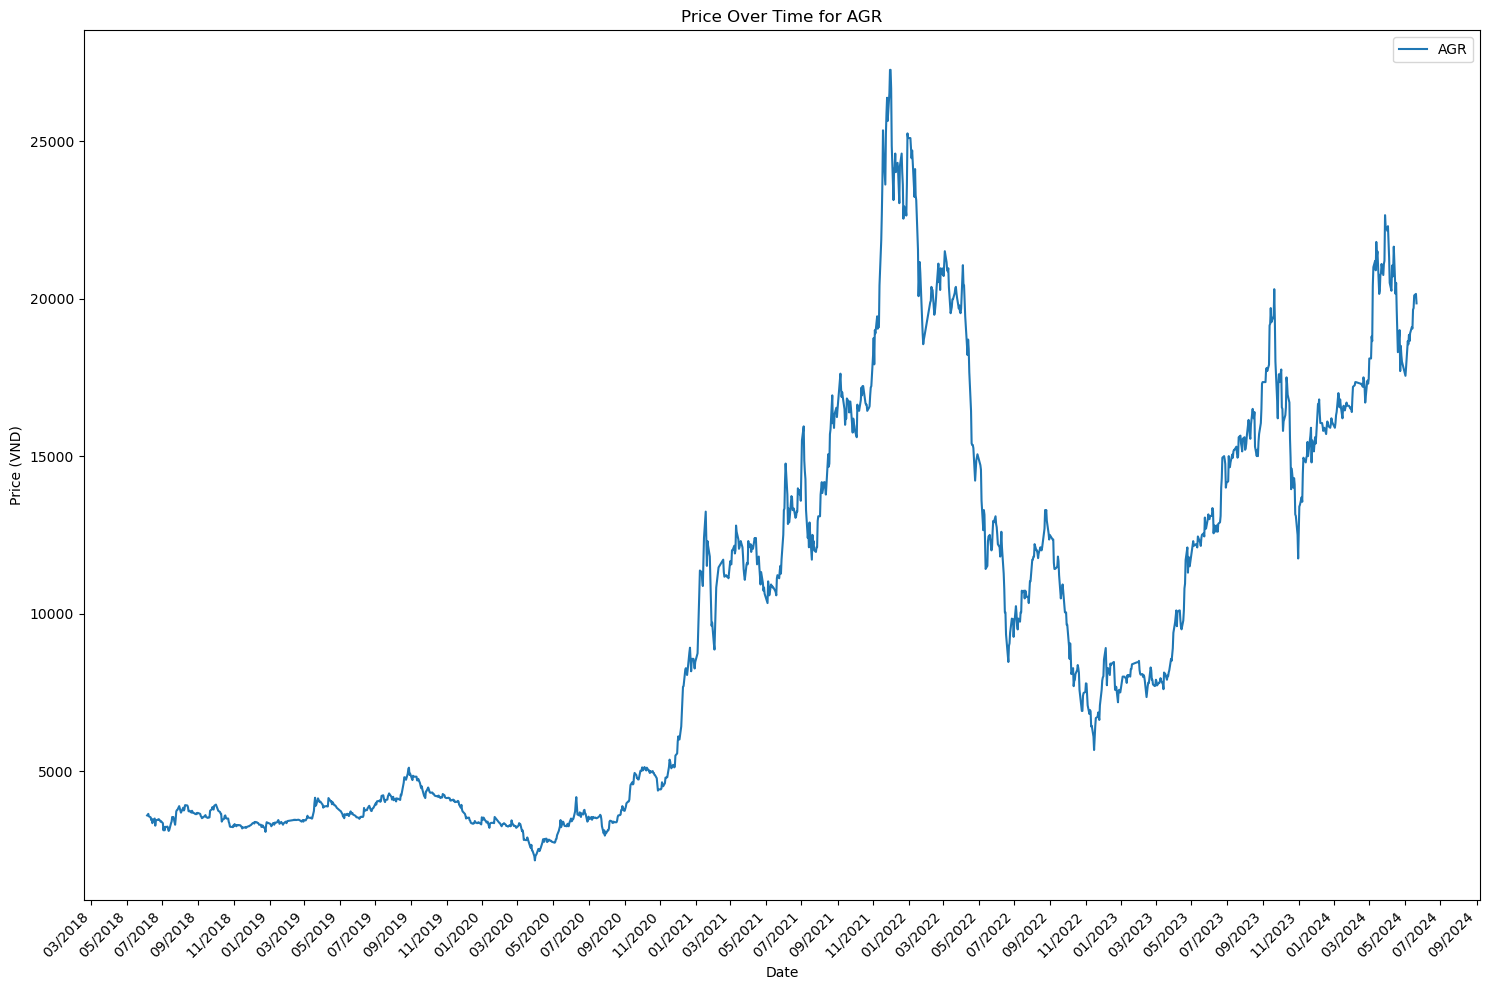

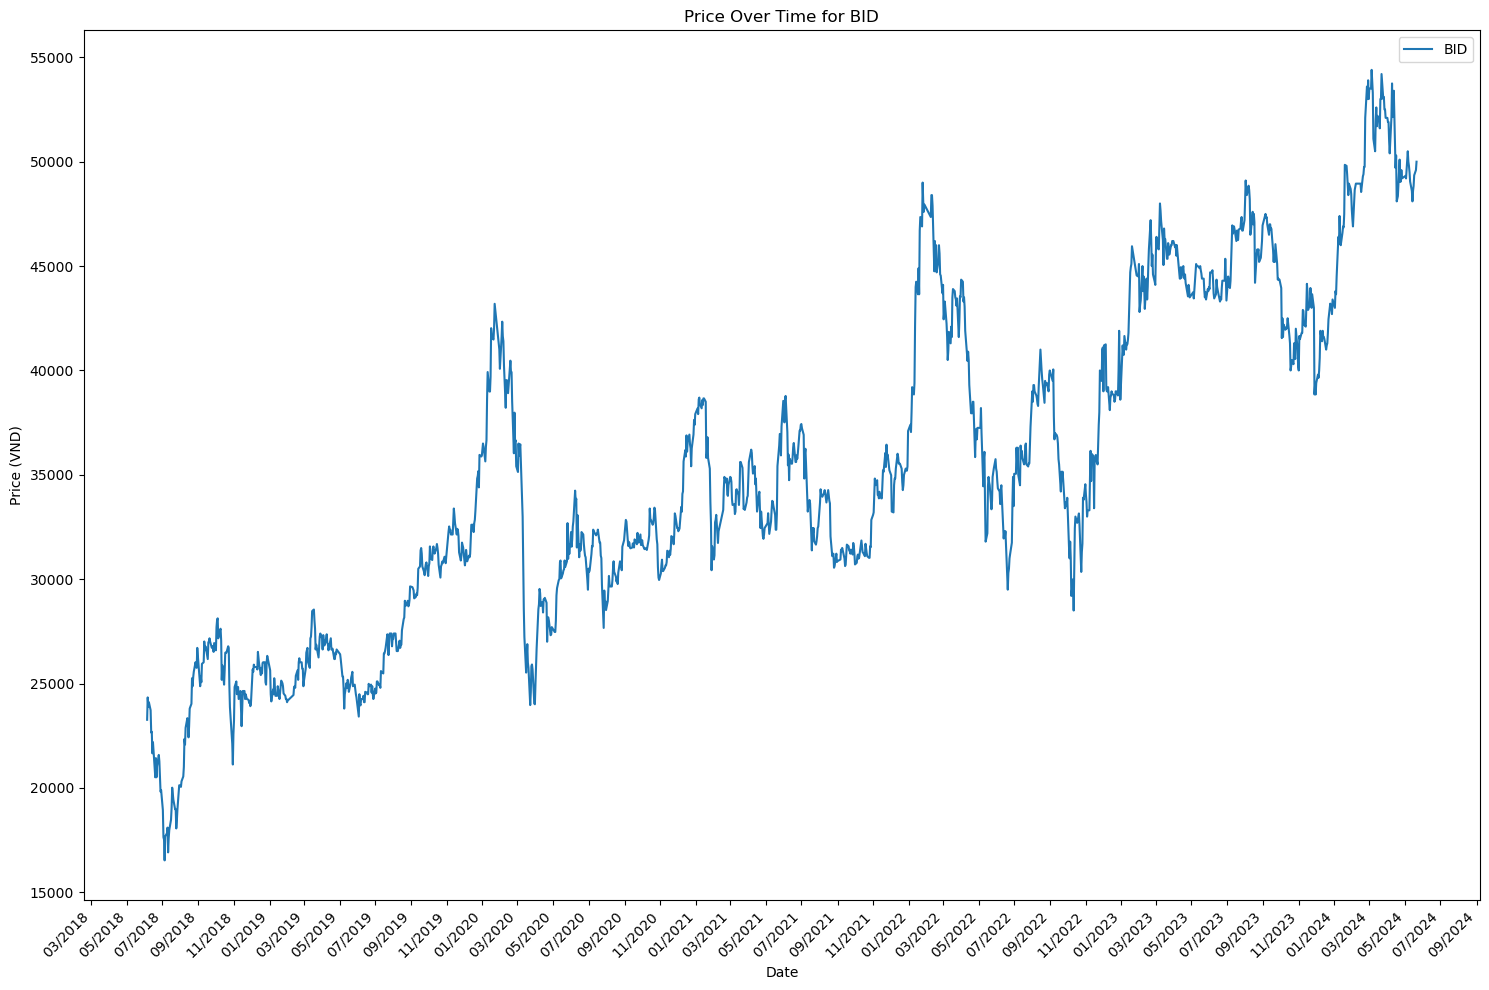

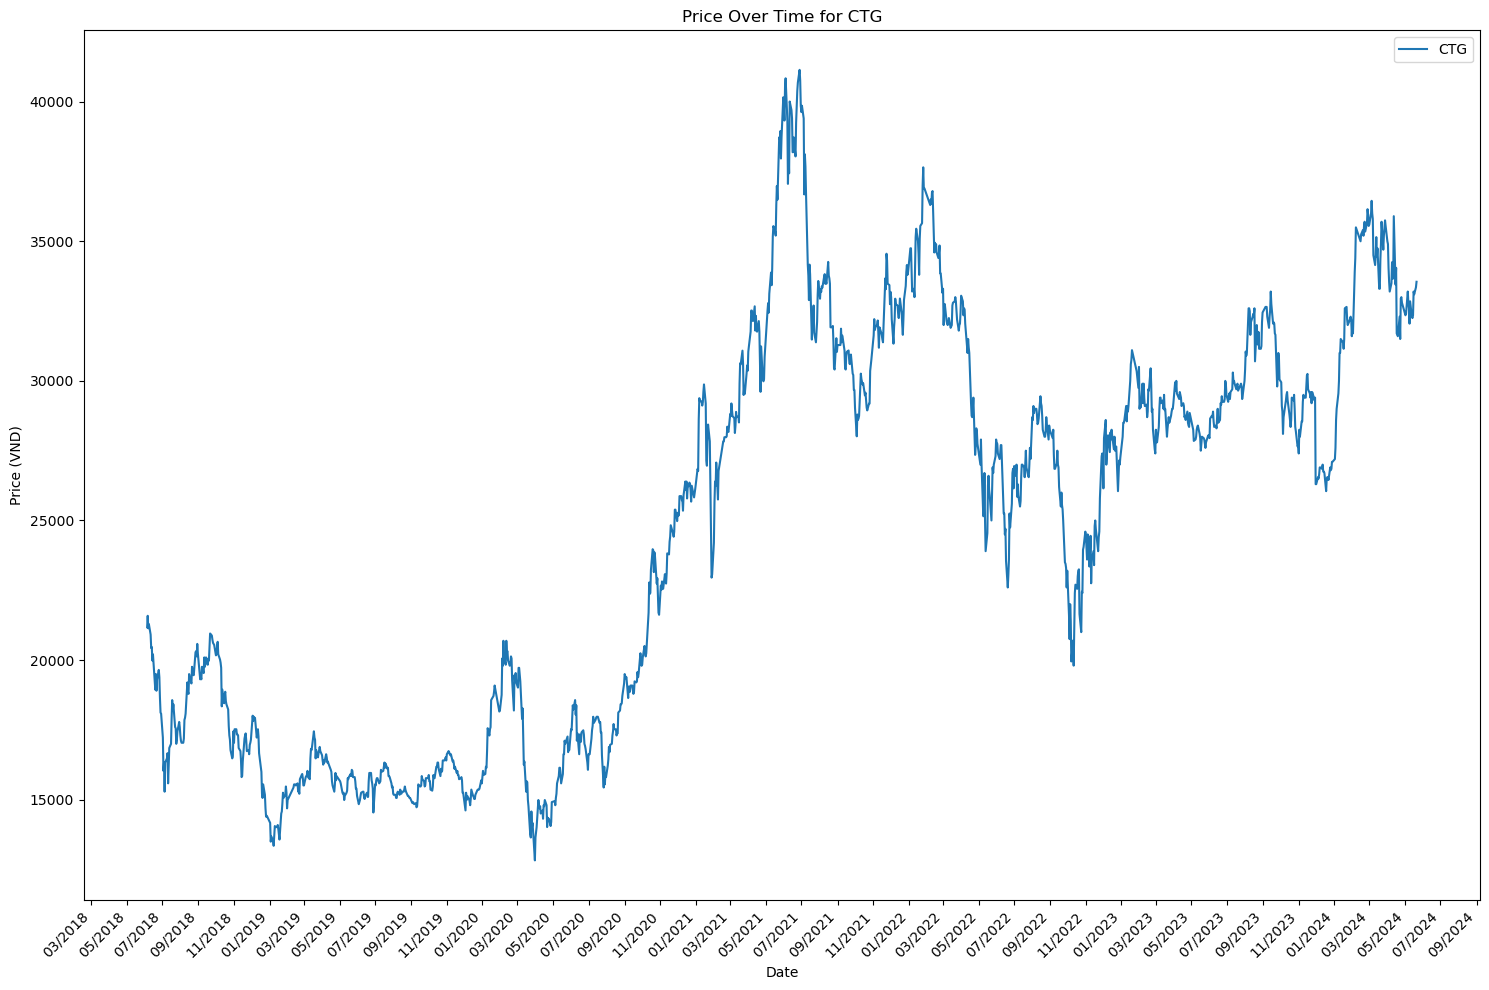

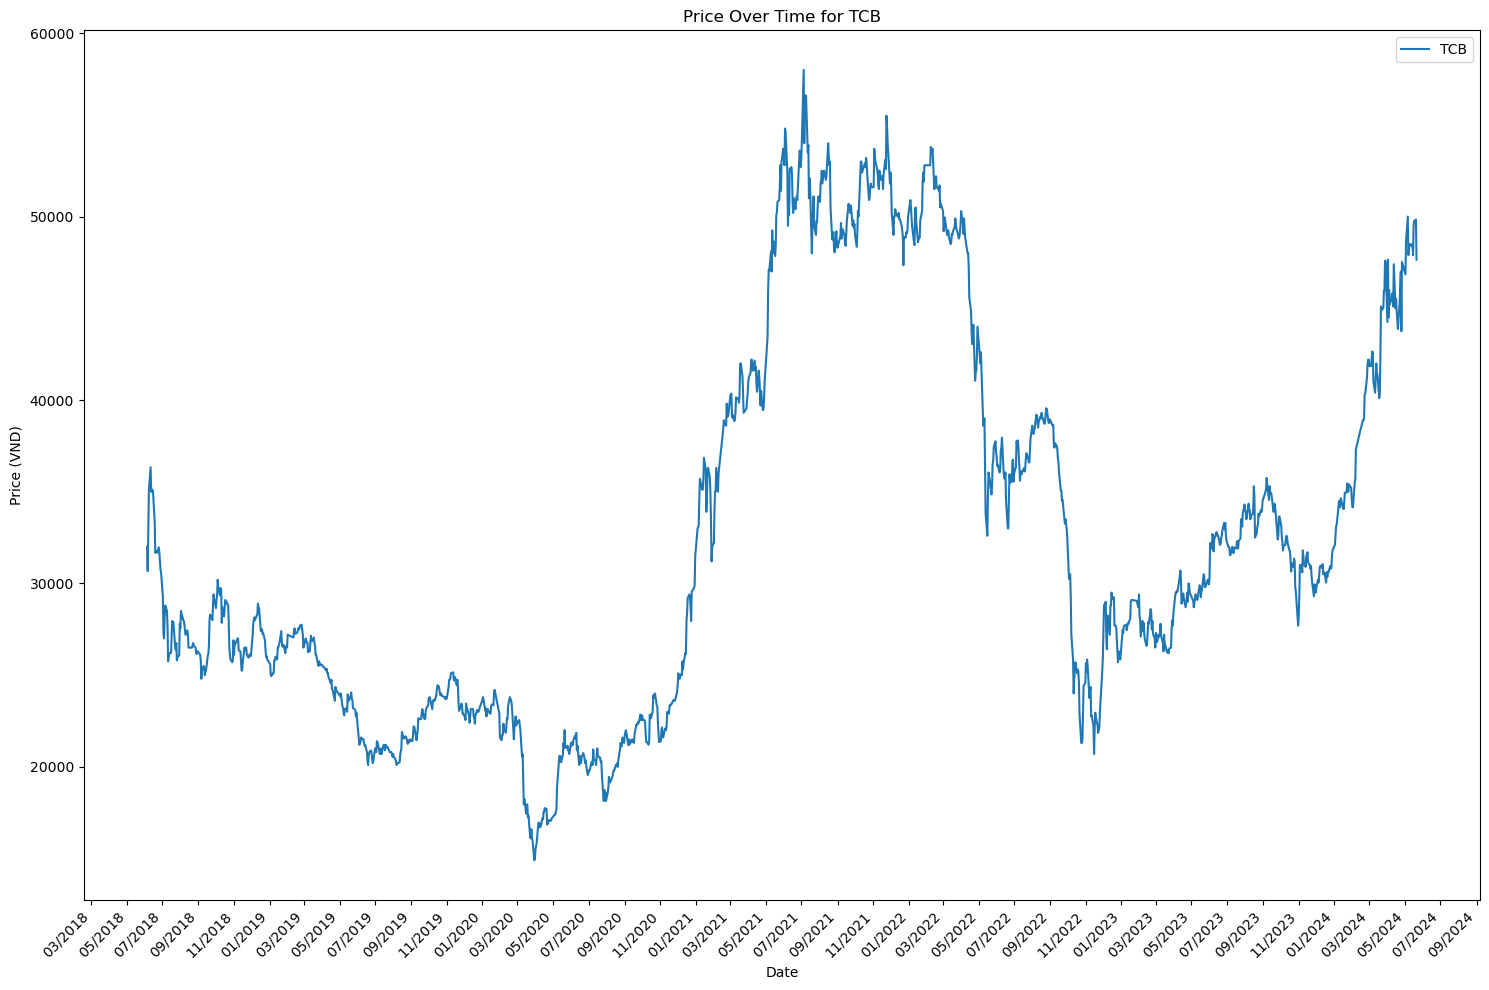

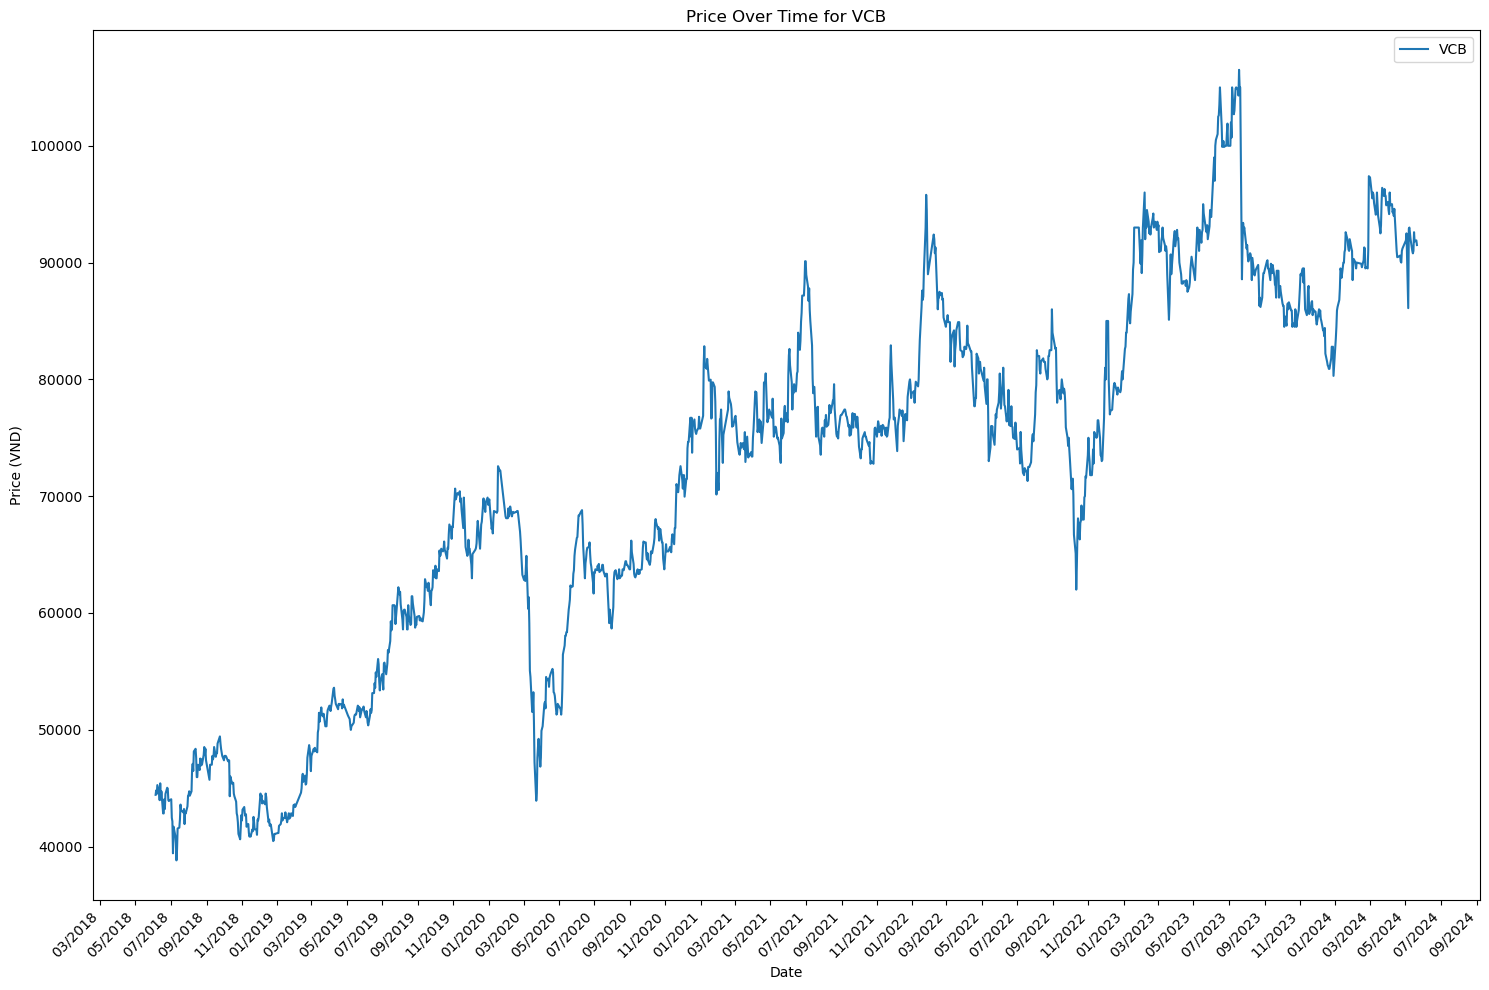

In [24]:
# Lấy danh sách các mã cổ phiếu duy nhất trong dữ liệu
unique_stock_codes = data['XSTC'].unique()

# Vẽ biểu đồ cho từng mã cổ phiếu
for code in unique_stock_codes:
    plot_price_over_time_for_stock(data, code)

Từ những biểu đồ trên, ta rút trích ra được 2 câu hỏi sau:

1. Phân tích giá cổ phiếu của AGR, CTG, TCB vào năm 2021 (vì sau khi plot những biểu đồ về price overtime thì thấy năm 2021 có sự tăng đột ngột về price của các ngân hàng này)
2. Phân tích giá cổ phiếu của AGR, CTG, TCB vào cuối năm 2022 (vì sau khi plot những biểu đồ về price overtime thì thấy cuối năm 2022 có sự giảm đột ngột về price, giảm xuống mức thấp nhất của các ngân hàng từ đầu 2021 trở đi)
<!-- 3. Những ngày có thay đổi phần trăm giá (Change %) lớn nhất có trùng với các sự kiện quan trọng nào trong thị trường hay không? -->

# 1. Phân tích giá cổ phiếu của AGR, CTG, TCB vào năm 2021 (vì sau khi plot những biểu đồ về price overtime thì thấy năm 2021 có sự tăng đột ngột về price của các ngân hàng này)

In [25]:
# Lọc dữ liệu cho các cổ phiếu AGR, CTG, TCB vào năm 2021
stocks = ['AGR', 'CTG', 'TCB']
data_2021 = data[(data.index.year == 2021) & (data['XSTC'].isin(stocks))]

data_2021

,Price,Open,High,Low,Vol.,Change %,XSTC
Date,,,,,,,
2021-01-04,8740.0,8661.3,8917.2,8543.1,3370000.0,3.26,AGR
2021-01-05,9350.2,8740.0,9350.2,8671.1,5790000.0,6.98,AGR
2021-01-06,9990.0,9822.6,9990.0,9763.6,2940000.0,6.84,AGR
2021-01-07,10678.9,10236.0,10678.9,10236.0,3700000.0,6.90,AGR
2021-01-08,11367.9,11171.0,11417.1,10728.1,5350000.0,6.45,AGR
...,...,...,...,...,...,...,...
2021-12-27,48850.0,49400.0,49400.0,48500.0,4730000.0,-0.10,TCB
2021-12-28,49150.0,49250.0,49350.0,48700.0,7470000.0,0.61,TCB
2021-12-29,49100.0,49150.0,49650.0,49000.0,6140000.0,-0.10,TCB


Sử dụng Moving Average để làm mượt dữ liệu chuỗi thời gian

In [26]:
def plot_moving_average(df, stock_code, window=30, figsize=(15, 10)):
    """
    Vẽ biểu đồ giá cổ phiếu và 30-day Moving Average cho một mã cổ phiếu cụ thể.

    Args:
    - df: DataFrame chứa dữ liệu.
    - stock_code: Mã cổ phiếu cần vẽ biểu đồ.
    - window: Số ngày để tính Moving Average (mặc định là 30).
    - figsize: Kích thước của biểu đồ (mặc định là (15, 10)).
    """
    # Lọc dữ liệu cho mã cổ phiếu
    stock_data = df[df['XSTC'] == stock_code]['Price']
    
    # Nếu không có dữ liệu cho mã cổ phiếu, hiển thị thông báo và thoát khỏi hàm
    if stock_data.empty:
        print(f"Không tìm thấy dữ liệu cho mã cổ phiếu: {stock_code}")
        return

    # Tạo biểu đồ
    plt.figure(figsize=figsize)
    
    # Vẽ giá cổ phiếu
    stock_data.plot(label=f'{stock_code} Price', legend=True)
    
    # Tính và vẽ 30-day Moving Average
    stock_data.rolling(window=window).mean().plot(label=f'{stock_code} {window}-day MA', legend=True)
    
    # Đặt tiêu đề và nhãn trục
    plt.title(f'Moving Average of {stock_code} Price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    
    # Hiển thị biểu đồ
    plt.show()

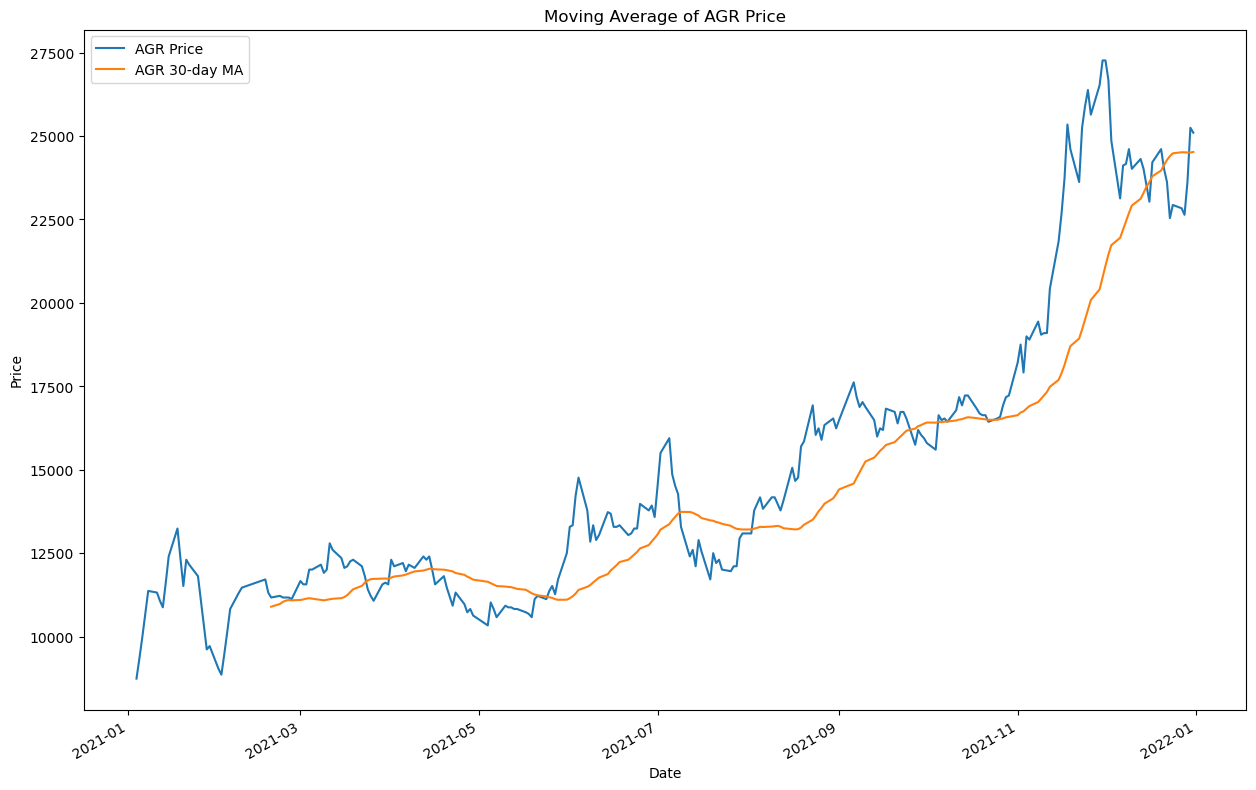

In [27]:
plot_moving_average(data_2021, 'AGR')

Lý do ([Nguồn để đối chiếu](https://cafef.vn/chung-khoan-agribank-agr-lai-rong-quy-4-tang-gap-5-lan-cung-ky-lnst-ca-nam-2021-xap-xi-400-ty-dong-vuot-23-ke-hoach-20220119094850741.chn)): 
- Trong năm 2021, hoạt động cho vay và phải thu của AGR đóng góp 33% doanh thu hoạt động.
- Mảng môi giới cũng bứt phá gần gấp 3 lần cùng kỳ năm trước (quý 4/2020)
- Chi phí hoạt động trong quý 4/2021 lại được tiết giảm mạnh 57% và chi phí quản lý công ty giảm 54% so với quý 4 năm trước.
- Hồi tháng 10/2021, HĐQT Agriseco đã thông qua việc điều chỉnh kế hoạch kinh doanh năm 2021 giúp tăng lên.

Kết quả đạt được:
- CTCP Chứng khoán Agribank (HOSE: AGR) công bố lợi nhuận sau thuế 6 tháng đầu năm 2021 đạt 294 tỷ đồng, gấp gần 7 lần cùng kỳ 2020, xóa toàn bộ lỗ lũy kế. Doanh thu đạt 344 tỷ đồng, vượt 134% kế hoạch và lợi nhuận trước thuế 312 tỷ đồng, vượt 242% kế hoạch năm. EPS 4 quý đạt 1,650 đồng/cổ phiếu, với giá cổ phiếu AGR hiện giao dịch quanh mức 13,300 đồng/cổ phiếu. [Nguồn để đối chiếu](https://vietstock.vn/2021/08/chung-khoan-agribank-agr-lai-gap-doi-sau-soat-xet-dat-312-ty-dong-737-882420.htm)

- Cho đến giữa năm là tháng 6 bắt đầu có sự tăng trưởng đột biến và chạm đỉnh ở vào cuối năm 2021. Cụ thể: Tổng vốn của AgriBank tăng lên 7.0 tỷ USD vào ngày 31/12/2021, tăng 426.4 triệu USD so với năm trước, chủ yếu nhờ vào thu nhập ròng và phát hành cổ phiếu. Tiền mặt và đầu tư đạt 19.7 tỷ USD, với thanh khoản đủ để trang trải nợ đến hạn trong 158 ngày, vượt xa mức tối thiểu 90 ngày. AgriBank đã vượt tất cả các yêu cầu vốn quy định. [Nguồn để đối chiếu](https://www.prnewswire.com/news-releases/agribank-reports-fourth-quarter-2021-and-year-end-financial-results-301494235.html)

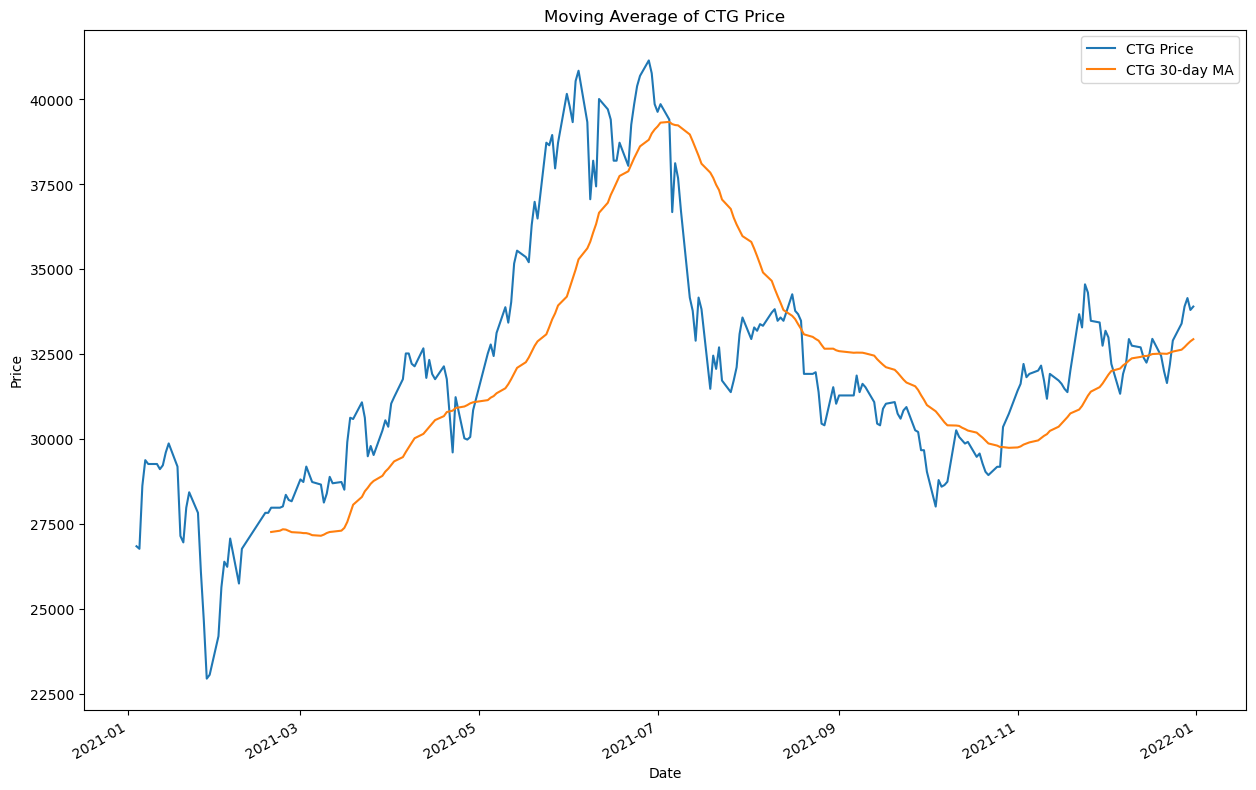

In [28]:
plot_moving_average(data_2021, 'CTG')

| Từ viết tắt | Giải thích                                                               |
|-------------|--------------------------------------------------------------------------|
| YoY         | Year over Year, so sánh giữa cùng kỳ của hai năm liên tiếp (năm nay so với năm trước). |
| QoQ         | Quarter over Quarter, so sánh giữa hai quý liên tiếp (quý này so với quý trước).         |
| NII         | Net Interest Income, thu nhập lãi thuần.                                 |
| TOI         | Total Operating Income, tổng thu nhập hoạt động.                         |


Lý do:
- Sự tăng trưởng mạnh mẽ về NII và TOI, cùng với các sáng kiến ​​chiến lược như hợp tác độc quyền với Manulife và kế hoạch thoái vốn đã mang lại cơ hội tăng trưởng.
- Kết quả kinh doanh tích cực năm 2021: VietinBank đã đạt những kết quả kinh doanh rất tích cực, với dư nợ tín dụng tăng mạnh, tỷ trọng dư nợ sinh lời cao như Bán lẻ và DN vừa và nhỏ tăng từ 54% lên 57%.
- Kiểm soát rủi ro và tối ưu hóa chi phí: VietinBank đã kiểm soát tốt tỷ lệ nợ xấu ở mức 1,26% và tăng cường trích lập dự phòng rủi ro, tỷ lệ bao nợ xấu đạt 180,4%. Chi phí hoạt động (CIR) duy trì ở mức thấp, chỉ 30,1%, cho thấy việc quản lý chi phí hiệu quả.
- Đầu tư vào công nghệ số và dịch vụ ngân hàng điện tử: VietinBank đã tăng trưởng mạnh mẽ về số lượng và giá trị giao dịch qua kênh điện tử, với 652 triệu giao dịch và 9,1 triệu tỷ đồng. Điều này cho thấy ngân hàng đang đẩy mạnh chuyển đổi số và cải thiện trải nghiệm khách hàng, giúp tăng trưởng doanh thu từ dịch vụ.
- Chính sách hỗ trợ khách hàng và cộng đồng: VietinBank đã chi hơn 11,8 nghìn tỷ đồng cho chương trình tái cơ cấu dư nợ và các hoạt động hỗ trợ cộng đồng trong bối cảnh đại dịch COVID-19. Điều này không chỉ tăng cường lòng tin của nhà đầu tư mà còn giúp VietinBank củng cố vai trò và trách nhiệm xã hội.

Kết quả đạt được:
- Lợi nhuận quý 1 của VietinBank (CTG) tăng vọt lên 6.462 tỷ đồng (+167,6% YoY, +20,6% QoQ), đây là kết quả hoạt động mạnh nhất của công ty kể từ khi niêm yết. Dư nợ tín dụng giảm nhẹ so với quý trước (không đổi QoQ) nhưng vẫn cải thiện mạnh so với cùng kỳ năm trước (+8,3% YoY). [Nguồn để đối chiếu](https://www.kbsec.com.vn/pic/Service/KBSV_CTG_Update_1Q2021.pdf)

- NII quý 2 của VietinBank (CTG) là 10.879 tỷ đồng (+2,2% QoQ, +39,5% YoY) và TOI đạt 14.083 tỷ đồng (+9,0% QoQ, +41,2% YoY). [Nguồn để đối chiếu](https://www.kbsec.com.vn/pic/Service/KBSV_Updated_CTG_2Q2021.pdf)

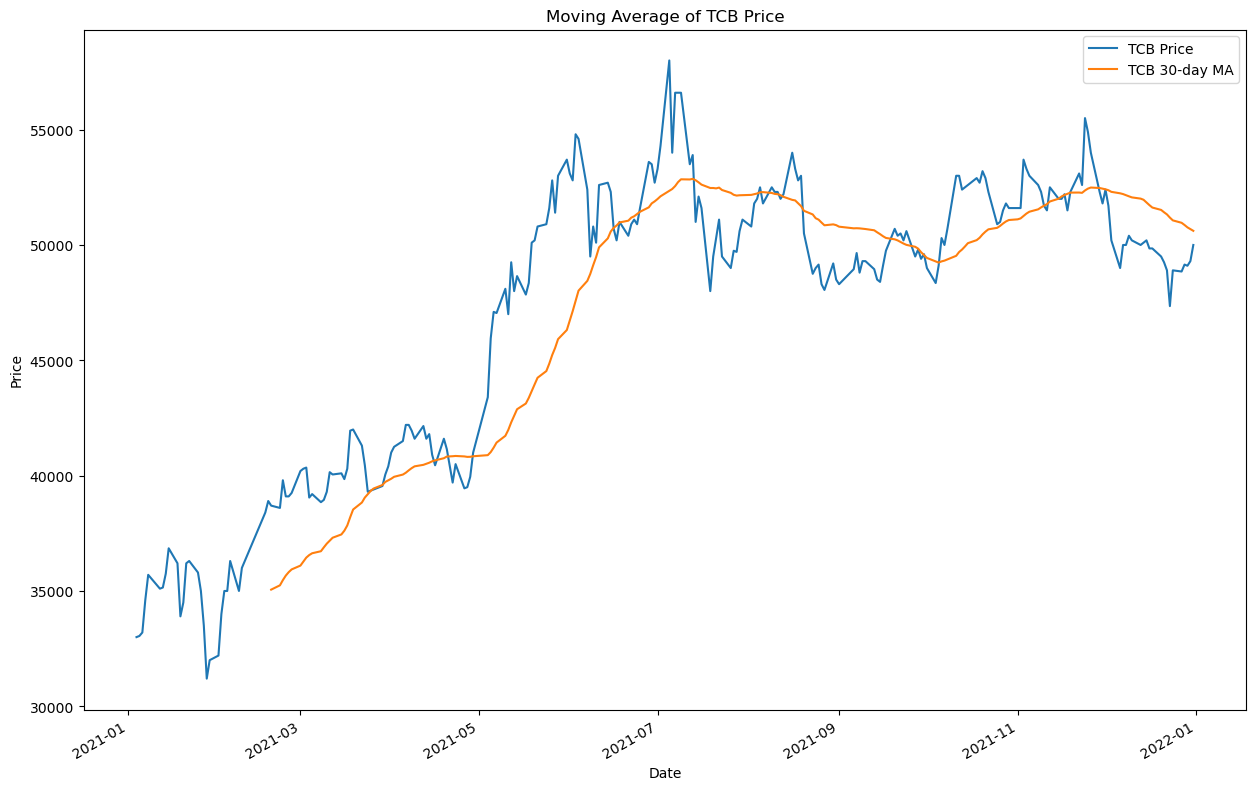

In [29]:
plot_moving_average(data_2021, 'TCB')

| Từ viết tắt | Giải thích                              |
|-------------|------------------------------------------|
| YoY         | Year over Year, so sánh theo năm         |
| LNTT        | Lợi nhuận trước thuế                     |
| TOI         | Tổng thu nhập hoạt động                  |
| ROA         | Return on Assets, lợi nhuận trên tài sản |
| NIM         | Net Interest Margin, biên lãi thuần      |
| CASA        | Current Account Savings Account, tỷ lệ tiền gửi không kỳ hạn |
| NFI         | Net Fee Income, thu nhập phí thuần       |
| NII         | Net Interest Income, thu nhập lãi thuần  |

Lý do ([Nguồn để đối chiếu](https://voh.com.vn/kinh-te/techcombank-cong-bo-ket-qua-kinh-doanh-2021-ty-le-casa-vuot-50-424726.html)):

- Kết quả kinh doanh ấn tượng cho thấy sự tăng trưởng và khả năng sinh lời của ngân hàng.
- Tăng trưởng về tỷ lệ CASA giúp Techcombank giảm chi phí huy động vốn và tăng cường lợi nhuận.
- Quản lý rủi ro và chi phí hợp lý: Ngân hàng duy trì chi phí hoạt động ở mức thấp cho thấy Techcombank đang quản lý hiệu quả và tối ưu hóa các hoạt động.
- Đầu tư vào công nghệ số và dịch vụ ngân hàng điện tử: Techcombank đã tăng trưởng mạnh mẽ về số lượng và giá trị giao dịch qua kênh điện tử, lên tới 652 triệu giao dịch và 9,1 triệu tỷ đồng. Việc ra mắt ứng dụng Techcombank Mobile mới cũng là một yếu tố quan trọng giúp thu hút thêm khách hàng và tăng trưởng doanh thu từ dịch vụ.
- Dư nợ tín dụng và tiền gửi tăng mạnh: cho thấy Techcombank đang mở rộng cả về dư nợ cho vay và tiền gửi.
- Chính sách hỗ trợ khách hàng và cộng đồng: Techcombank đã chi hơn 11,8 nghìn tỷ đồng cho chương trình tái cơ cấu dư nợ và các hoạt động hỗ trợ cộng đồng trong bối cảnh đại dịch COVID-19. Điều này tăng cường lòng tin của cả nhà đầu tư và khách hàng về sự bền vững và trách nhiệm xã hội của ngân hàng.

Kết quả đạt được ([Nguồn để đối chiếu](https://www.kbsec.com.vn/pic/Service/KBSV_FTM_TCB_Eng_20220126.pdf)): 
- Techcombank (TCB) ghi nhận kết quả kinh doanh ấn tượng năm 2021 với lợi nhuận trước thuế (LNTT) đạt 23.238 tỷ đồng (+47,1% YoY) và tổng thu nhập hoạt động (TOI) đạt 37.076 tỷ đồng (+37,1% YoY). Tỷ lệ lợi nhuận trên tài sản (ROA) tăng lên 3,7% từ 3,1% năm 2020. Biên lãi thuần (NIM) đạt 5,6% trong quý 4 năm 2021 nhờ tối ưu hóa chi phí vốn và tăng tỷ lệ CASA lên 50,5%. Thu nhập phí thuần (NFI) tăng 42% YoY. Tỷ lệ nợ xấu năm 2021 ở mức 0,7%, thấp so với tiêu chuẩn ngành, và các khoản nợ được cơ cấu lại giảm đáng kể xuống còn 1,9 nghìn tỷ đồng. 

# 2. Phân tích giá cổ phiếu của AGR, CTG, TCB vào cuối năm 2022 (vì sau khi plot những biểu đồ về price overtime thì thấy cuối năm 2022 có sự giảm đột ngột về price, giảm xuống mức thấp nhất của các ngân hàng từ đầu 2021 trở đi)

In [30]:
# Lấy data năm 21, 22
data_21_22 = data[(data.index.year >= 2021) & (data.index.year <= 2022)]

data_21_22

,Price,Open,High,Low,Vol.,Change %,XSTC
Date,,,,,,,
2021-01-04,8740.0,8661.3,8917.2,8543.1,3370000.0,3.26,AGR
2021-01-05,9350.2,8740.0,9350.2,8671.1,5790000.0,6.98,AGR
2021-01-06,9990.0,9822.6,9990.0,9763.6,2940000.0,6.84,AGR
2021-01-07,10678.9,10236.0,10678.9,10236.0,3700000.0,6.90,AGR
2021-01-08,11367.9,11171.0,11417.1,10728.1,5350000.0,6.45,AGR
...,...,...,...,...,...,...,...
2022-12-26,78900.0,79200.0,80800.0,78900.0,1200000.0,-0.25,VCB
2022-12-27,79100.0,80200.0,80500.0,78900.0,1060000.0,0.25,VCB
2022-12-28,80000.0,80400.0,82000.0,79500.0,1170000.0,1.14,VCB


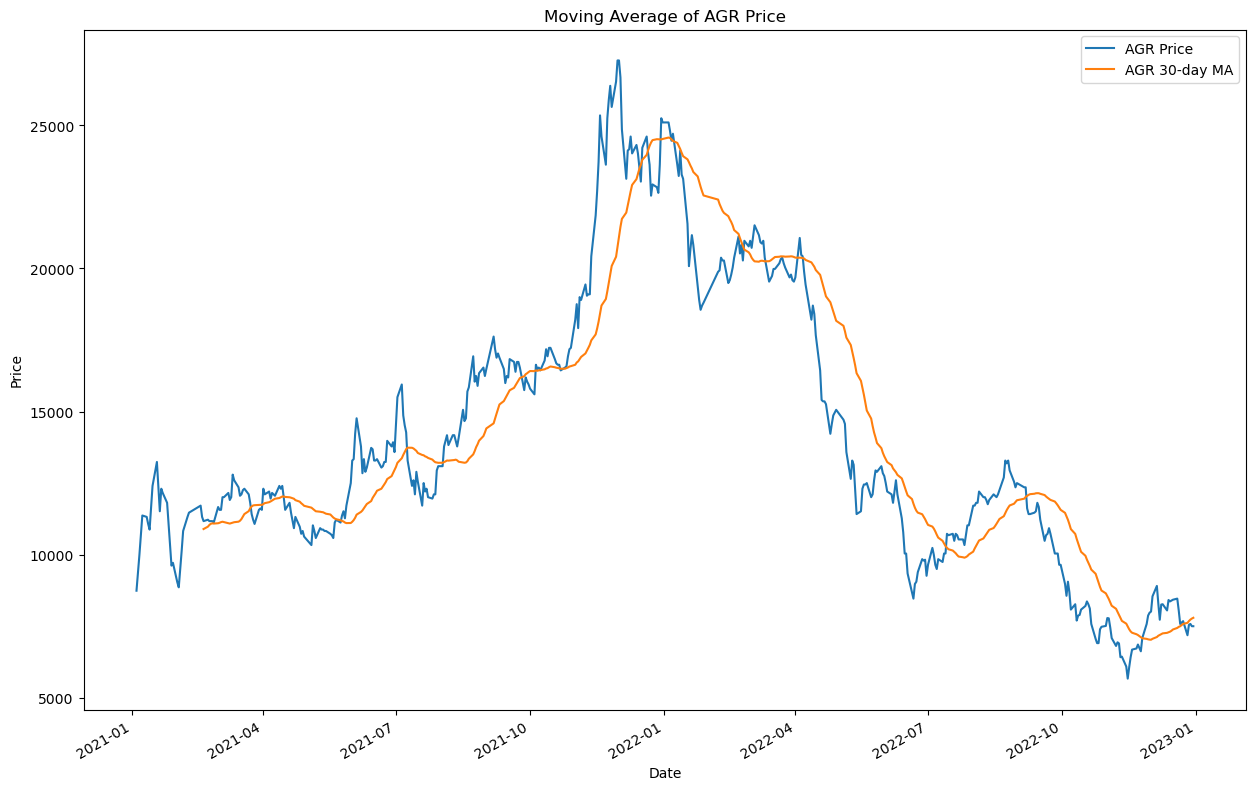

In [31]:
plot_moving_average(data_21_22, 'AGR')


Lý do ([Nguồn 1](https://baodautu.vn/quy-ii2022-loi-nhuan-chung-khoan-agribank-giam-916-ve-con-2154-ty-dong-d169535.html) [Nguồn 2](https://markettimes.vn/quy-2-2022-cac-nguon-thu-ngoai-lai-cua-agribank-giam-manh-3287.html)): 

- Thị trường chứng khoán khó khăn: Thị trường chứng khoán Việt Nam trong nửa đầu năm 2022 đang đối mặt với nhiều thách thức do tác động của dịch COVID-19, các biến động về giá cả và chính sách tiền tệ.
- Giảm mạnh thu nhập từ các nguồn khác: Trong quý 2/2022, doanh thu tài chính ghi nhận giảm mạnh thu nhập khác từ 149 tỷ đồng xuống còn 8,6 tỷ đồng. Đây là một phần lớn do cùng kỳ năm trước ghi nhận thu nhập từ việc chuyển nhượng khoản đầu tư góp vốn vào Công ty Hoàng Anh Gia Lai, năm nay không có khoản thu nhập tương tự.
- Giảm doanh thu từ các hoạt động chính: Các hoạt động môi giới, lãi/lỗ tài sản tài chính và lãi các khoản đầu tư nắm giữ đến ngày đáo hạn đều giảm so với cùng kỳ năm trước. Ví dụ, lãi các tài sản tài chính ghi nhận thông qua lãi/lỗ (FVTPL) giảm từ 15,8 tỷ đồng về 9,2 tỷ đồng.
- Chi phí hoạt động tăng lên: Dù có sự giảm chi phí quản lý từ 38 tỷ đồng xuống 13 tỷ đồng, chi phí hoạt động tổng thể vẫn tăng lên mức 47 tỷ đồng so với cùng kỳ âm 68 tỷ đồng. Điều này đóng góp vào việc giảm lợi nhuận sau thuế mạnh mẽ.
- Tăng cường trích lập dự phòng: Agribank đã tiến hành trích lập chi phí dự phòng rủi ro tín dụng, mặc dù giảm xuống còn 7.508,8 tỷ đồng trong nửa đầu năm 2022 (giảm 40,6% so với cùng kỳ năm trước), nhưng việc này vẫn ảnh hưởng đến lợi nhuận.
- Nợ xấu tăng mạnh: Agribank ghi nhận mức tăng mạnh của nợ xấu, với tỷ lệ nợ xấu tăng từ 1,87% vào cuối năm ngoái lên 2,15% khi kết thúc nửa đầu năm. Điều này cũng góp phần làm giảm lợi nhuận của ngân hàng.
- Dòng tiền hoạt động kinh doanh và đầu tư âm lớn: Dòng tiền hoạt động kinh doanh và đầu tư của Agribank ghi nhận số âm lớn, với dòng tiền thuần âm tới gần 85.000 tỷ đồng, điều này phản ánh khó khăn trong quản lý tài chính và dòng tiền của ngân hàng.


Kết quả ([Nguồn để đối chiếu](https://kinhtechungkhoan.vn/stores/customer_file/tannt/032023/24/Agriseco_-_Bao_cao_trien_vong_loi_nhuan_Q1.2023.pdf)):
- Lợi nhuận Q4.2022 của các doanh nghiệp trên cả 3 sàn giảm 32,6% so với cùng kỳ, đây là mức giảm mạnh nhất từ sau đại dịch Covid-19. Trong đó, khối tài chính chỉ giảm nhẹ 0,9% về lợi nhuận với nhóm ngân hàng vẫn tăng trưởng 18% trong Q4.2022. Khối phi tài chính có lợi nhuận sụt giảm mạnh lên đến 50% so với Q4.2021 với sự đi xuống của hầu hết các nhóm ngành bao gồm bán lẻ, bất động sản, xây dựng và vật liệu,… 

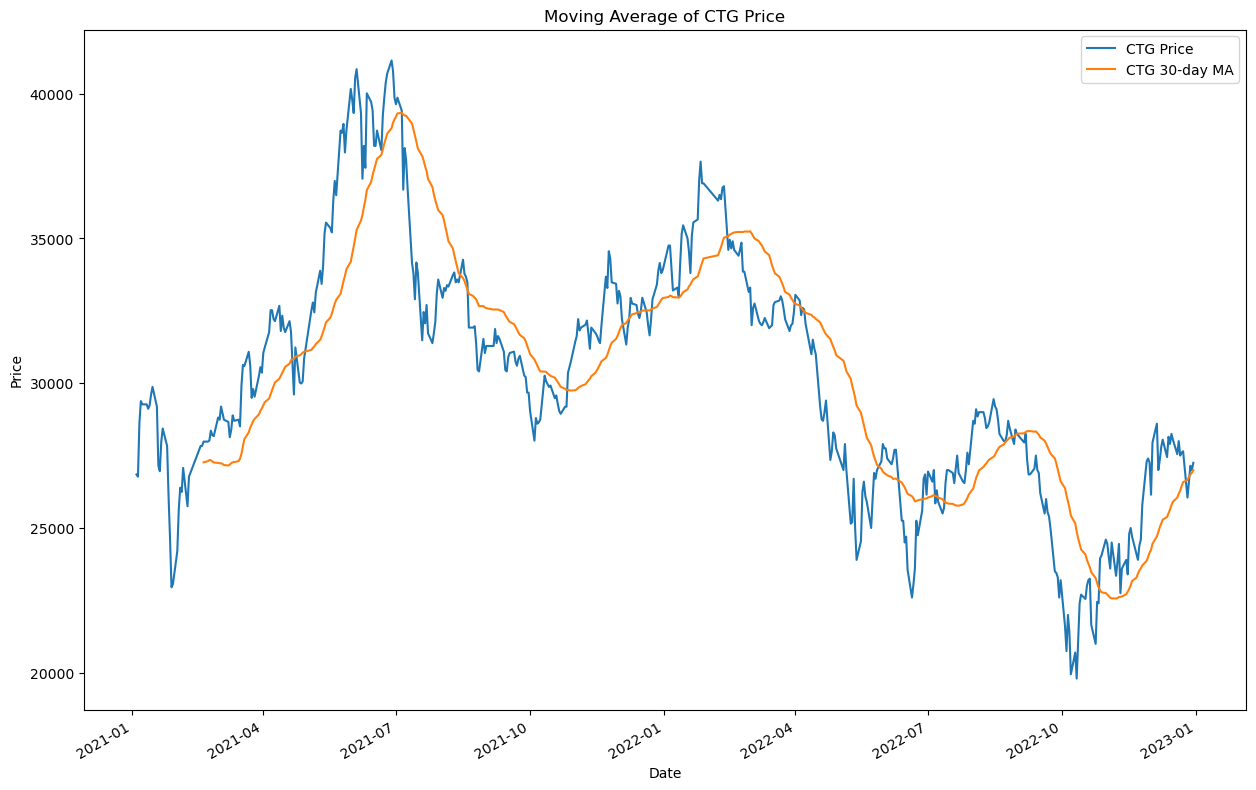

In [32]:
plot_moving_average(data_21_22, 'CTG')

| Từ viết tắt | Giải thích                              |
|-------------|------------------------------------------|
| NII         | Thu nhập lãi thuần                       |
| QoQ         | Quarter over Quarter, so sánh theo quý   |
| YoY         | Year over Year, so sánh theo năm         |

Lý do ([Nguồn 1](https://baodautu.vn/vietinbank-loi-nhuan-quy-i2022-giam-manh-tay-trich-lap-du-phong-bao-phu-no-xau-gan-200-d164950.html) [Nguồn 2](https://markettimes.vn/quy-1-2022-loi-nhuan-truoc-thue-cua-vietinbank-tang-truong-am-2038.html)):

- Lợi nhuận giảm mạnh trong Quý I/2022: VietinBank ghi nhận lợi nhuận trước thuế giảm đến 27,8% so với cùng kỳ năm trước. Điều này là do nguồn thu chính của ngân hàng giảm 4,7%, trong khi chi phí dự phòng rủi ro tăng mạnh gấp 3 lần. Điều này khiến cổ phiếu CTG bị ảnh hưởng bởi kết quả kinh doanh kém hơn dự kiến.
- Giảm sâu từ đầu tháng 4/2022: Cổ phiếu CTG giảm mạnh từ đầu tháng 4/2022, tức là từ khi công bố báo cáo tài chính Quý I/2022 của ngân hàng, giảm tới 24,36%, tương đương với mức giảm 8.050 đồng/cổ phiếu. Việc giảm này phản ánh sự lo ngại của thị trường đối với kết quả kinh doanh và triển vọng của VietinBank.
- Nợ xấu tăng mạnh: Tại cuối Quý I/2022, tổng nợ xấu nội bảng của VietinBank tăng đến 71,1% so với cùng kỳ năm trước, lên mức 15.321,5 tỷ đồng. Trong đó, các khoản nợ xấu nhóm 3 (nợ dưới tiêu chuẩn), nhóm 4 (nợ nghi ngờ) và nhóm 5 (nợ có khả năng mất vốn) đều tăng đáng kể. Điều này cho thấy ngân hàng đang gặp khó khăn trong việc quản lý tín dụng và rủi ro tín dụng, khiến nhà đầu tư lo ngại về khả năng phục hồi lợi nhuận trong tương lai.
- Hoạt động kinh doanh không khả quan: Mặc dù lãi thuần từ kinh doanh ngoại hối và hoạt động khác tăng mạnh, nhưng lãi thuần từ mua bán chứng khoán kinh doanh lại giảm sâu. Điều này cho thấy sự biến động lớn trong các hoạt động kinh doanh của ngân hàng, không đảm bảo sự ổn định trong lợi nhuận.

Kết quả ([Nguồn để đối chiếu](https://www.kbsec.com.vn/pic/Service/KBSV_1Q22Update_CTG_Eng_20220517.pdf)):

- Trong quý đầu năm 2022, Vietinbank (CTG) đạt được thu nhập lãi thuần (NII) là 10.146 tỷ đồng (-2,4% QoQ, -4,7% YoY). 

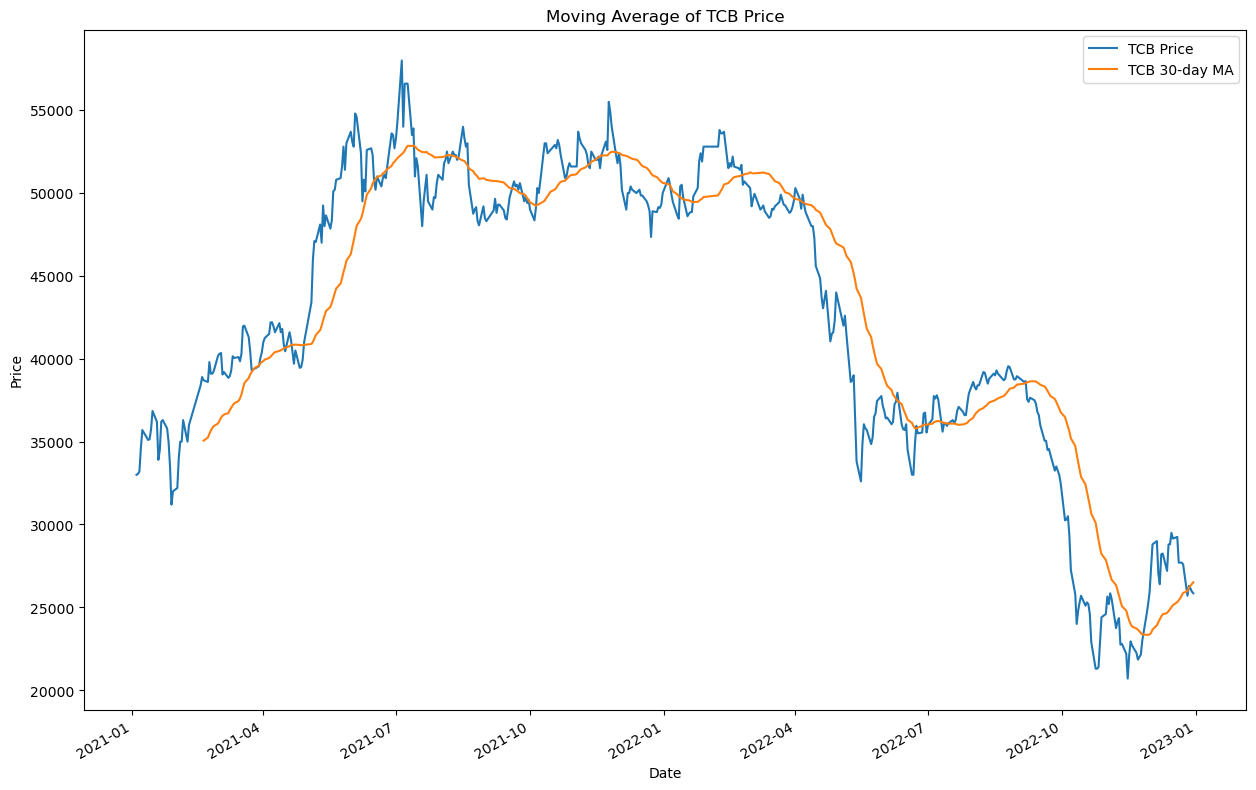

In [33]:
plot_moving_average(data_21_22, 'TCB')

Lý do:

- Chi phí vốn tăng: nguyên nhân chính của chi phí vốn tăng đến từ việc các ngân hàng trung ương trên toàn cầu tăng mạnh lãi suất nhiều lần trong năm 2022 và thanh khoản trong hệ thống bớt dồi dào hơn so với những năm trước.
- Điều này dẫn tới việc tăng lãi suất tiền gửi có kỳ hạn, tăng chi phí vốn trên cả thị trường cũng như làm giảm số dư tiền gửi không kỳ hạn (CASA) trong tổng cơ cấu tiền gửi của ngân hàng.
- Khả năng tăng trích lập dự phòng: Techcombank đã tăng trích lập dự phòng so với năm trước, lên 691 tỷ đồng, có thể do áp lực từ môi trường kinh tế khó khăn.
- Cơ cấu nguồn thu của Techcombank: Lãi thuần từ hoạt động dịch vụ giảm gần 400 tỷ đồng. Hoạt động ngoại hối và mua bán chứng khoán kinh doanh đều ghi nhận lỗ.
  
Kết quả:

- Tổng giá trị tài sản của Techcombank tăng 23% so với đầu năm, đạt gần 700 nghìn tỷ đồng, tuy nhiên lợi nhuận quý 4 giảm mạnh và CASA giảm dẫn đến tăng chi phí vốn. Nguyên nhân chính của chi phí vốn tăng là do các ngân hàng trung ương tăng mạnh lãi suất nhiều lần trong năm 2022. Tại cuối năm 2022, Techcombank có 373.000 khách hàng mới, tuy nhiên chi phí hoạt động cả năm tăng 20% lên 13,4 nghìn tỷ đồng, chủ yếu do chi phí marketing và công nghệ.

[Nguồn để đối chiếu](https://cafebiz.vn/loi-nhuan-techcombank-giam-hon-20-quy-4-2022-xuong-thap-nhat-9-quy-176230203104859967.chn)